In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from multiprocessing import Pool
from scipy.linalg import expm

In [2]:
def randomwalk_centrality(G, debug=False):
    vk = np.array(list(dict(G.degree()).values()))
    A = nx.adjacency_matrix(G).todense()
    P = np.multiply(A, 1/vk)
    if debug:
        print(P)
    P = expm(np.array(P)) / np.exp(1)
    if debug:
        print(P)
    
    centrality = -np.sum(np.multiply(P, np.log(P)), axis=1) # Sum the rows
    centrality = np.exp(centrality)
    centrality[np.isnan(centrality)] = 0 # The limit is 0

    return centrality

res = randomwalk_centrality(nx.star_graph(50), debug=True)
print(len(res))
res

[[0.   1.   1.   ... 1.   1.   1.  ]
 [0.02 0.   0.   ... 0.   0.   0.  ]
 [0.02 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.02 0.   0.   ... 0.   0.   0.  ]
 [0.02 0.   0.   ... 0.   0.   0.  ]
 [0.02 0.   0.   ... 0.   0.   0.  ]]
[[0.56766764 0.43233236 0.43233236 ... 0.43233236 0.43233236 0.43233236]
 [0.00864665 0.37187521 0.00399576 ... 0.00399576 0.00399576 0.00399576]
 [0.00864665 0.00399576 0.37187521 ... 0.00399576 0.00399576 0.00399576]
 ...
 [0.00864665 0.00399576 0.00399576 ... 0.37187521 0.00399576 0.00399576]
 [0.00864665 0.00399576 0.00399576 ... 0.00399576 0.37187521 0.00399576]
 [0.00864665 0.00399576 0.00399576 ... 0.00399576 0.00399576 0.37187521]]
51


array([1.02797257e+08, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00, 4.43799270e+00,
       4.43799270e+00, 4.43799270e+00, 4.43799270e+00])

In [3]:
eroadG   = nx.read_edgelist("euroroad.txt")
hamsterG = nx.read_edgelist("petser-hamster.tsv", comments="%")
neuralG  = nx.read_gml("celegansneural.gml")
usairG   = nx.read_weighted_edgelist("usairport.txt")

allG = [eroadG, hamsterG, neuralG, usairG]

In [4]:
for i in allG:
    print("Nodes:", len(i.nodes))
    print("Edges:", len(i.edges))
    print("Type:", type(i))

Nodes: 1174
Edges: 1417
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1858
Edges: 12534
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 297
Edges: 2359
Type: <class 'networkx.classes.multidigraph.MultiDiGraph'>
Nodes: 1574
Edges: 17215
Type: <class 'networkx.classes.graph.Graph'>


In [5]:
for i in range(len(allG)):
    allG[i] = nx.Graph(allG[i])
    allG[i] = sorted(nx.connected_component_subgraphs(allG[i]), key=len, reverse=True)[0]

In [6]:
for i in allG:
    print("Nodes:", len(i.nodes))
    print("Edges:", len(i.edges))
    print("Type:", type(i))

Nodes: 1039
Edges: 1305
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1788
Edges: 12476
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 297
Edges: 2148
Type: <class 'networkx.classes.graph.Graph'>
Nodes: 1572
Edges: 17214
Type: <class 'networkx.classes.graph.Graph'>


# Problem 1

In [6]:
from scipy.linalg import expm

def randomwalk_centrality(G, debug=False):
    vk = np.array(list(dict(G.degree()).values()))
    A = nx.adjacency_matrix(G).todense()
    P = np.multiply(A, 1/vk)
    if debug:
        print(P)
    P = expm(np.array(P)) / np.exp(1)
    if debug:
        print(P)
    
    centrality = -np.sum(np.multiply(P, np.log(P)), axis=1) # Sum the rows
    centrality = np.exp(centrality)
    centrality[np.isnan(centrality)] = 0 # The limit is 0

    return centrality

res = randomwalk_centrality(allG[3], debug=True)
print(len(res))
res

[[0.00000000e+00 2.25000000e-01 7.77777778e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.50000000e+00 0.00000000e+00 2.98111111e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.50000000e+00 6.70750000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
1572


array([0., 0., 0., ..., 0., 0., 0.])

/home/mathjs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


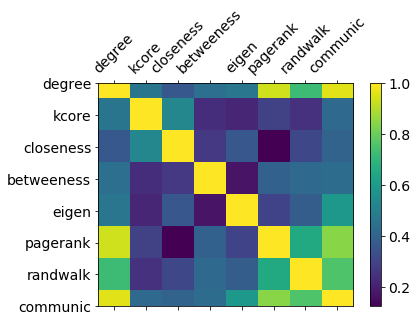

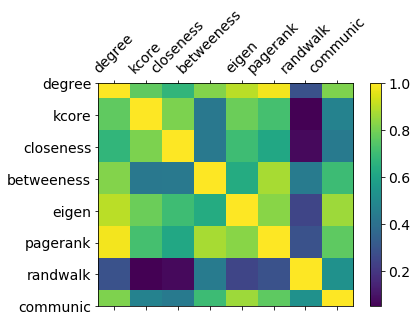

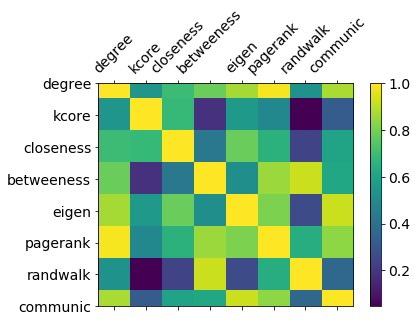

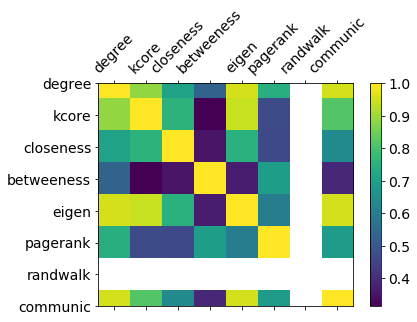

In [182]:
def getval(r):
    return np.array(list(dict(r).values()))

for g in allG:
    #print("degree")
    deg = getval(nx.degree_centrality(g))
    #print("kcore")
    kcore = getval(nx.core_number(g))
    #print("closeness")
    close = getval(nx.closeness_centrality(g))
    #print("betweeness")
    bet = getval(nx.betweenness_centrality(g))
    #print("eigenvector")
    eig = getval(nx.eigenvector_centrality(g, max_iter=1000, tol=1e-4))
    #print("page rank")
    pr  = getval(nx.pagerank(g))
    #print("random walk")
    rw  = randomwalk_centrality(g)
    #print("communicability")
    comm = nx.communicability_exp(g)
    comm = np.array([ comm[key1][key1] for key1 in comm.keys() ])
    
    data = np.transpose([deg, kcore, close, bet, eig, pr, rw, comm])
    df = pd.DataFrame(data,
        columns=["degree", "kcore", "closeness", "betweeness", "eigen", "pagerank", "randwalk", "communic"])
    
    # Special thanks for the plot goes to jrjc in
    # https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
    f = plt.figure()
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=70)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.show()

The first graph is the weirdest one, so let's plot it

/home/mathjs/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


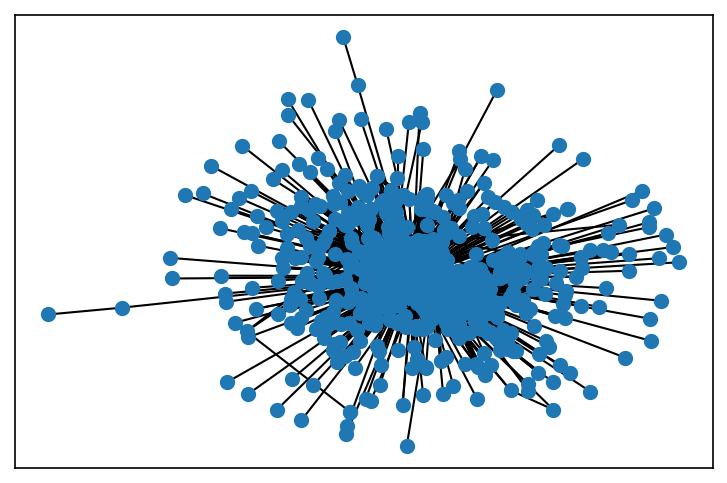

In [8]:
plt.figure(dpi=150)
nx.draw_networkx(allG[3], with_labels=False, node_size=40)
plt.show()

Let's see the degree distribution

2 197
3 145
4 108
5 80
6 41
7 39
8 32
9 40
10 23
11 21
12 22
13 18
14 29
15 14
16 11
17 23
18 17
19 21
20 12
21 16
22 8
23 13
24 12
25 10
26 9
27 13
28 7
29 8
30 6
31 3
32 3
33 6
34 3
35 6
36 5
37 6
38 1
39 3
40 4


<BarContainer object of 165 artists>

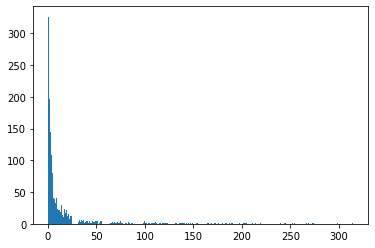

In [27]:
degs = list(dict(nx.degree(allG[3])).values())
for i in np.unique(degs)[1:40]:
    print(i, np.sum(degs == i))

aux = np.array([ (i, np.sum(degs == i)) for i in np.unique(degs) ])
plt.bar(aux[:,0], aux[:,1])

### It is still very weird that the centrality measures are not correlated for the first graph. Let's keep investigating it

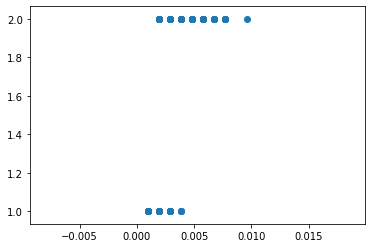

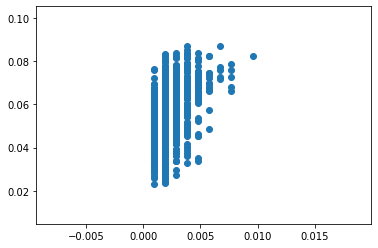

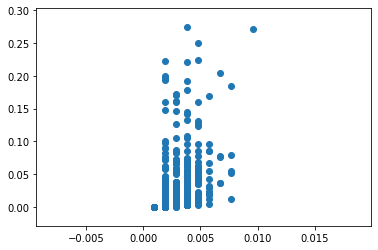

In [32]:
def getval(r):
    return np.array(list(dict(r).values()))

#print("degree")
deg = getval(nx.degree_centrality(allG[0]))
#print("kcore")
kcore = getval(nx.core_number(allG[0]))
#print("closeness")
close = getval(nx.closeness_centrality(allG[0]))
#print("betweeness")
bet = getval(nx.betweenness_centrality(allG[0]))

plt.figure()
plt.scatter(deg, kcore)
plt.show()

plt.figure()
plt.scatter(deg, close)
plt.show()

plt.figure()
plt.scatter(deg, bet)
plt.show()

(array([127., 554., 174., 112.,  46.,  15.,   5.,   5.,   0.,   1.]),
 array([0.00096339, 0.00183044, 0.0026975 , 0.00356455, 0.0044316 ,
        0.00529865, 0.0061657 , 0.00703276, 0.00789981, 0.00876686,
        0.00963391]),
 <a list of 10 Patch objects>)

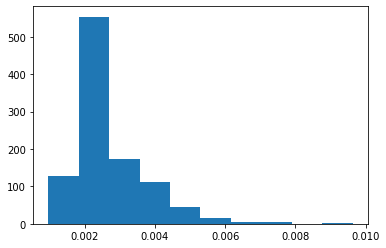

In [35]:
plt.hist(deg)

### Well, for the first graph it seems we have an enormous amount of low-degree nodes, which is making the centrality measures sort of "random"

### However, for the other 3 graphs, we see that the centrality measures are all highly correlated.

### What is specially interesting is that the page rank is very highly correlated to the degree centrality

### The betweeness seems to have little to do with the k-core

### In the last graph, we could not calculate the randomwalk centrality, as the exponential of the P matrix yields Infinite in all matrix entries.

# Problem 2

In [7]:
import osmnx

In [18]:
placeNames = (
        "Lambari, Minas Gerais, Brazil",
        "São Lourenço, Minas Gerais, Brazil",
        "Vila Velha, Espírito Santo, Brazil",
        "Teresópolis, Rio de Janeiro, Brazil"
    )

placeG = [ osmnx.graph_from_place(PLACE, network_type="drive") for PLACE in placeNames]
placeG

Lambari, Minas Gerais, Brazil


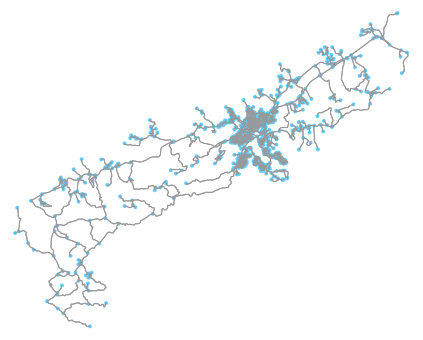

São Lourenço, Minas Gerais, Brazil


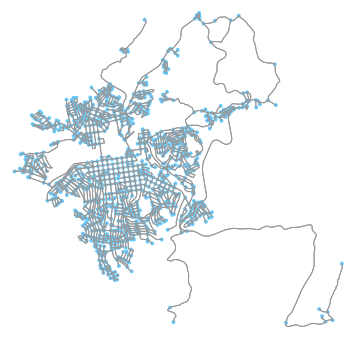

Vila Velha, Espírito Santo, Brazil


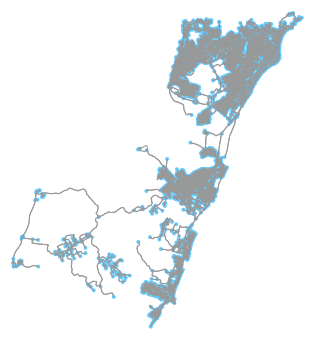

Teresópolis, Rio de Janeiro, Brazil


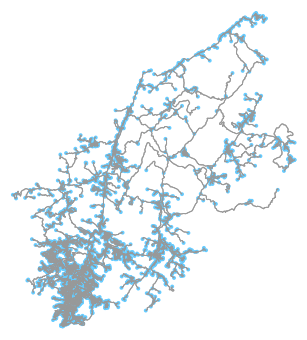

In [22]:
for (G, name) in zip(placeG, placeNames):
    print(name)
    osmnx.plot_graph(G)

In [10]:
for G in placeG:
    print(len(G.nodes), len(G.edges))

1087 2825
1285 3565
8040 22045
4450 10058


In [15]:
auxG = [ nx.DiGraph(G) for G in placeG ]
auxG = [ nx.to_undirected(G) for G in auxG ]
auxG

In [16]:
for G in auxG:
    print(len(G.nodes), len(G.edges))

1087 2799
1285 3520
8040 21986
4450 9949


In [17]:
placeG = auxG

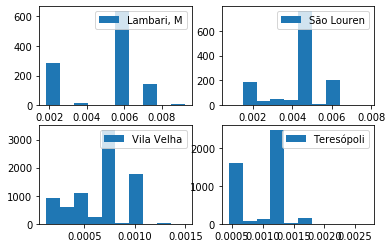

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax = np.ravel(ax)

for i in [0, 1, 2, 3]:
    ax[i].hist(list(dict(nx.degree_centrality(placeG[i])).values()), label=placeNames[i][:10])
    ax[i].legend()

Progress: 0
Progress: 1
Progress: 2
Progress: 3


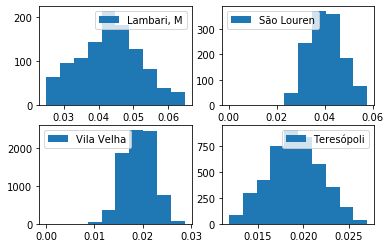

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax = np.ravel(ax)

for i in [0, 1, 2, 3]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.closeness_centrality(placeG[i])).values()), label=placeNames[i][:10])
    ax[i].legend()

Progress: 0
Progress: 1
Progress: 2
Progress: 3


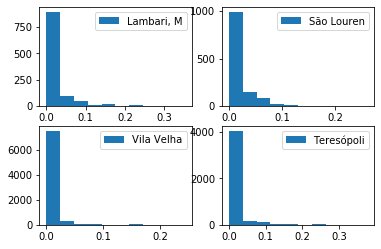

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax = np.ravel(ax)

for i in [0, 1, 2, 3]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.betweenness_centrality(placeG[i])).values()), label=placeNames[i][:10])
    ax[i].legend()

## The degree centrality isn't being much helpful here. If most nodes have low degree, it likely means that paths between two nodes tend to be longer (which would reflect in the closeness centrality); on the other hand, if most nodes have high degree, that would mean that it is easy to get lost in that city. Under this light, I'd say all the 4 cities have decent degree centrality histograms.

## The closeness histograms are very enlightening. We see that both Lambari and São Lourenço have the highest mean closeness (0.4), which means that accessibility is better from one node to the other. The histograms of Lambari and Teresópolis have a higher variance, which probably means that these cities are less "uniform", in the sense that there probably exist high-degree centers as well as low-degree peripheral nodes. This is confirmed by the graphics plotted before.

## The betweeness histograms show that the majority of nodes in all cities do not need to be visited if we go between arbitrary nodes A and B. This is natural and expected considering the context. It catches the eye, however, that São Lourenço's histogram's tail is longer, which means that it has more nodes that are "innevitable" to pass through, which likely means that the city can be divided in 2 (or more) sections, and going from one section to the other require you to go through certain nodes.

# Problem 3

In [7]:
humanG = nx.read_edgelist("maayan-vidal.txt")
prot2004G = nx.read_edgelist("celegans-protein2004.txt")
prot2007G = nx.read_edgelist("celegans-protein2007.txt")
powerG = nx.read_edgelist("powergrid.txt")
depsG  = nx.read_edgelist("dependencies.csv")

allNames = ["Human Proteins", "Proteins 2004", "Proteins 2007", "Power Grid", "Dependencies"]
allG = [humanG, prot2004G, prot2007G, powerG, depsG]

In [8]:
for G, name in zip(allG, allNames):
    print(name)
    print(len(G.nodes), len(G.edges))

Human Proteins
3133 6726
Proteins 2004
1237 1735
Proteins 2007
1496 1816
Power Grid
4941 6594
Dependencies
2376 5129


In [9]:
for i in range(len(allG)):
    allG[i] = sorted(nx.connected_component_subgraphs(allG[i]), reverse=True, key=len)[0]

for G, name in zip(allG, allNames):
    print(name)
    print(len(G.nodes), len(G.edges))

Human Proteins
2783 6438
Proteins 2004
1084 1639
Proteins 2007
1108 1554
Power Grid
4941 6594
Dependencies
2335 5101


Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4


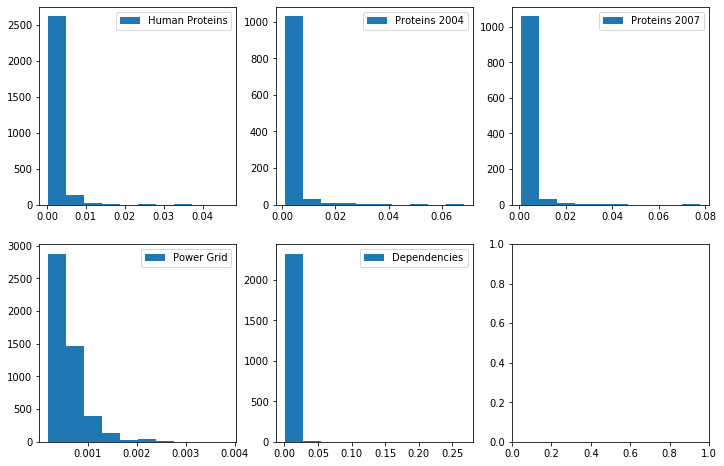

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#plt.subplots_adjust(hspace=0.4)
ax = np.ravel(ax)

for i in [0, 1, 2, 3, 4]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.degree_centrality(allG[i])).values()), label=allNames[i][:15])
    ax[i].legend()

Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4


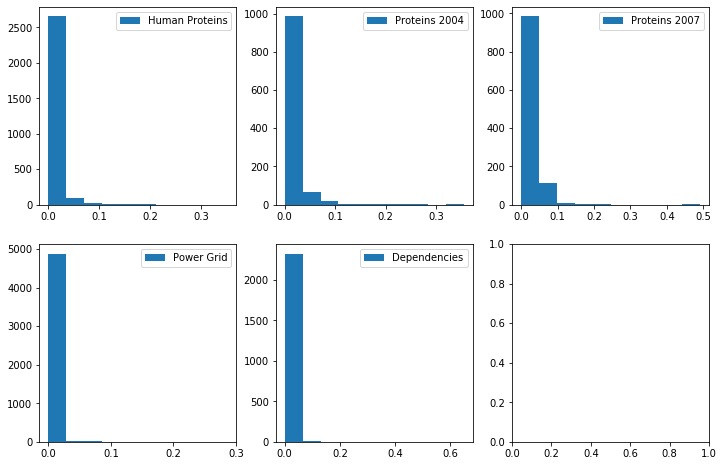

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#plt.subplots_adjust(hspace=0.4)
ax = np.ravel(ax)

for i in [0, 1, 2, 3, 4]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.eigenvector_centrality(allG[i], max_iter=10000)).values()), label=allNames[i][:15])
    ax[i].legend()

Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4


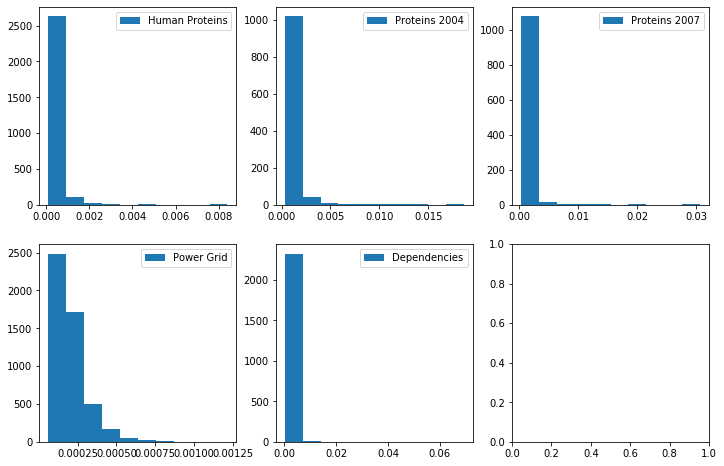

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#plt.subplots_adjust(hspace=0.4)
ax = np.ravel(ax)

for i in [0, 1, 2, 3, 4]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.pagerank(allG[i])).values()), label=allNames[i][:15])
    ax[i].legend()

Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4


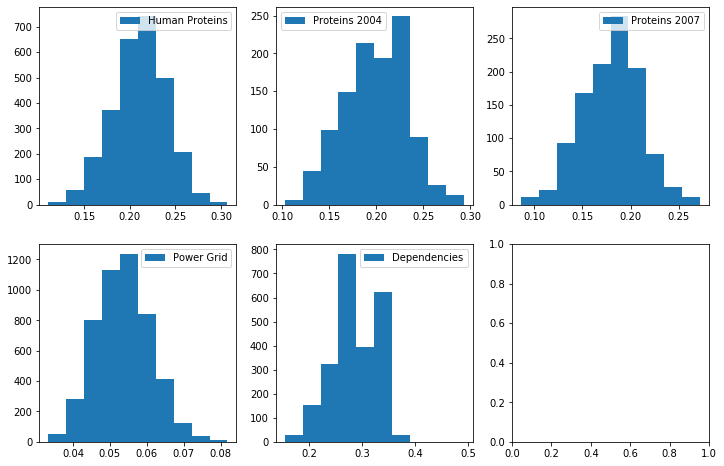

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#plt.subplots_adjust(hspace=0.4)
ax = np.ravel(ax)

for i in [0, 1, 2, 3, 4]:
    print("Progress:", i)
    ax[i].hist(list(dict(nx.closeness_centrality(allG[i])).values()), label=allNames[i][:15])
    ax[i].legend()

## The degree histograms again dont offer much information. Most networks have too many nodes with low degree. The power grid network catches the eye because it has a longer tail, meaning that more nodes have higher degree here.

## The eigenvector centrality histograms point that most networks have almost no central nodes. The protein networks have a little more central nodes, but it's not a significant amount.

## The pagerank centrality was supposed to yield very similar results than eigenvector centrality. For most networks we observe this. A significant change, however, is observed in the Power Grid network, as much more nodes are more central here; since the graph is undirected, I can't really tell why this happened. It could be that we have a small amount of high-degree nodes that are very interconnected among themselves.

## The closeness centrality shows that the R Dependencies network has very high closeness, whereas the power grid network has very low closeness. Also, the R network also shows a more peculiar histogram shape, with a fat left tail and a slim right tail.

## We see that, yes, the protein networks are very similar to each other. This is most noticeable in the closeness histograms, where the protein networks display similar means, variances and shapes. The power grid shows similar shape, but the mean is drastically lower. The R network shows different shape and higher mean.

# Problem 4

In [ ]:
# Remove self edges
for i in range(len(allG)):
    allG[i].remove_edges_from(nx.selfloop_edges(allG[i]))

def getval(r):
    return np.array(list(dict(r).values()))

#for i in range(len(allG)):
#    degs = getval(allG[i].degree)
#    print(sum(degs == 0))

allData = []

for i, g in enumerate(allG):
    print("Progress:", i)
    #print("degree")
    deg = getval(nx.degree_centrality(g))
    #print("kcore")
    kcore = getval(nx.core_number(g))
    #print("closeness")
    close = getval(nx.closeness_centrality(g))
    print("betweeness")
    bet = getval(nx.betweenness_centrality(g))
    print("eigenvector")
    eig = getval(nx.eigenvector_centrality(g, max_iter=1000, tol=1e-4))
    #print("page rank")
    pr  = getval(nx.pagerank(g))
    #print("random walk")
    rw  = randomwalk_centrality(g, debug=True)
    print("communicability")
    comm = nx.communicability_exp(g)
    comm = np.array([ comm[key1][key1] for key1 in comm.keys() ])
    
    data = np.transpose([deg, kcore, close, bet, eig, pr, rw, comm])
    df = pd.DataFrame(data,
        columns=["degree", "kcore", "closeness", "betweeness", "eigen", "pagerank", "randwalk", "communic"])
    allData.append(df)

In [147]:
from scipy.stats import moment, entropy

metrics = ["degree", "kcore", "closeness", "betweeness", "eigen", "pagerank", "randwalk", "communic"]
statistics = ["mean", "stddev", "moment2", "entropy"]

columns = []
for m in metrics:
    for s in statistics:
        columns.append(m + s.upper())

df = []

for D in allData:
    data = []
    for m in metrics:
        col = D[m]
        data.extend([col.mean(), col.std(), moment(col, 2), entropy(col)])
    df.append(data)

matrix = np.matrix(df)
pd.DataFrame(df, columns=columns)

,degreeMEAN,degreeSTDDEV,degreeMOMENT2,degreeENTROPY,kcoreMEAN,kcoreSTDDEV,kcoreMOMENT2,kcoreENTROPY,closenessMEAN,closenessSTDDEV,...,pagerankMOMENT2,pagerankENTROPY,randwalkMEAN,randwalkSTDDEV,randwalkMOMENT2,randwalkENTROPY,communicMEAN,communicSTDDEV,communicMOMENT2,communicENTROPY
0,0.001552,0.002529,6.391470e-06,7.324674,2.356091,1.450862,2.104245,7.755137,0.210941,0.029336,...,2.412312e-07,7.502704,5.982560e+16,3.148080e+18,9.906844e+36,1.786641e-02,3.095798e+03,2.663173e+04,7.089944e+08,5.074339
1,0.002729,0.005049,2.546608e-05,6.344783,1.604244,0.857976,0.735443,6.863776,0.199402,0.033103,...,1.989448e-06,6.510622,3.532100e+10,1.074335e+12,1.153130e+24,3.285111e-01,9.030421e+01,5.649377e+02,3.188602e+05,4.624548
2,0.002446,0.004523,2.044285e-05,6.360616,1.459386,0.769315,0.591311,6.894324,0.180538,0.030847,...,2.377718e-06,6.503274,1.980570e+11,6.592627e+12,4.342350e+25,5.615487e-05,3.221596e+01,1.853639e+02,3.432877e+04,5.041595
3,0.000540,0.000363,1.314829e-07,8.320819,1.735074,0.576218,0.331959,8.449777,0.053679,0.007379,...,1.147117e-08,8.386265,1.207368e+01,1.510305e+02,2.280559e+04,6.514297e+00,4.320384e+00,8.138725e+00,6.622545e+01,8.008064
4,0.001872,0.007067,4.992780e-05,6.796607,2.332334,1.249869,1.561503,7.614719,0.285038,0.041453,...,2.786022e-06,6.933504,3.090093e+101,1.493190e+103,2.228660e+206,1.799442e-63,1.074672e+08,2.189391e+09,4.791379e+18,4.400297


## Now to apply PCA in this...

In [148]:
# Normalize columns because some columns have too large values
for col in range(matrix.shape[1]):
    matrix[:,col] = (matrix[:,col] - matrix[:,col].mean()) / matrix[:,col].std()

matrix

matrix([[-3.60629131e-01, -6.02551203e-01, -8.11696930e-01,
          3.99826526e-01,  1.22259689e+00,  1.46188023e+00,
          1.56799464e+00,  4.04894836e-01,  3.33478748e-01,
          8.05206424e-02, -1.41338420e-01,  5.08914629e-01,
         -1.10617790e+00, -1.84810313e+00, -1.67780633e+00,
          1.15617980e+00, -3.47113265e-01, -6.35827864e-01,
         -6.91183811e-01,  8.78740910e-01, -6.91167597e-01,
         -8.83841653e-01, -1.09067743e+00,  4.71998490e-01,
         -5.00000000e-01, -5.00000000e-01, -0.00000000e+00,
         -5.26114379e-01, -4.99946724e-01, -4.99977409e-01,
         -5.00000000e-01, -2.70497170e-01],
        [ 1.17742939e+00,  4.99750761e-01,  2.87897510e-01,
         -9.27478131e-01, -7.81493309e-01, -3.82167395e-01,
         -4.97015323e-01, -1.10145856e+00,  1.79687900e-01,
          4.13181236e-01,  2.98842039e-01, -1.12477429e+00,
          7.53724524e-01,  1.72126886e-01,  1.11858607e-02,
         -5.79528264e-01,  9.19907064e-01,  1.22814432e+

In [178]:
matrix = matrix.transpose()
cov = np.cov(matrix)
cov

array([[ 1.25      ,  0.92753141,  0.67507736, ...,  0.03604218,
         0.03604458, -1.05192712],
       [ 0.92753141,  1.25      ,  1.1994702 , ...,  0.86421678,
         0.86421856, -1.08690824],
       [ 0.67507736,  1.1994702 ,  1.25      , ...,  1.06127373,
         1.06127654, -0.8968845 ],
       ...,
       [ 0.03604218,  0.86421678,  1.06127373, ...,  1.25      ,
         1.25      , -0.48967345],
       [ 0.03604458,  0.86421856,  1.06127654, ...,  1.25      ,
         1.25      , -0.48966976],
       [-1.05192712, -1.08690824, -0.8968845 , ..., -0.48967345,
        -0.48966976,  1.25      ]])

## Let's see the importance of each eigenvector

[0.53704239 0.84287568 0.9977549  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


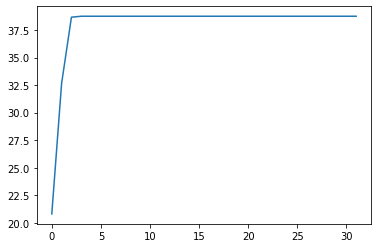

In [174]:
vals, vecs = np.linalg.eig(cov)
# Take the magnitudes of each eigenvalue
mags = np.sqrt(np.real(vals)**2 + np.imag(vals)**2)

# Sort based on magnitude
idx = np.argsort(mags)[::-1] # This inverts the sort
mags = mags[idx]
vals = vals[idx]
vecs = vecs[:,idx]

# Let us plot the importance of each eigenvalue
aux = np.cumsum(mags)
plt.plot(aux)
print(aux / max(aux))

## We see that 3 eigenvectors are enough to represent our data well enough

## Let's project the original data then

In [175]:
base = vecs[:,:3]
base

array([[ 0.20608008+0.j, -0.16604779+0.j, -0.06775331+0.j],
       [ 0.23710462+0.j,  0.02673514+0.j,  0.10642292+0.j],
       [ 0.2110595 +0.j,  0.08117595+0.j,  0.19828936+0.j],
       [-0.22152489+0.j,  0.13605667+0.j,  0.03901472+0.j],
       [ 0.03846876+0.j,  0.30636223+0.j, -0.13037544+0.j],
       [ 0.11384671+0.j,  0.2191886 +0.j, -0.26164361+0.j],
       [ 0.09006681+0.j,  0.23008622+0.j, -0.27492472+0.j],
       [-0.18881709+0.j,  0.20092317+0.j,  0.07026998+0.j],
       [ 0.22550441+0.j,  0.1168836 +0.j, -0.0695877 +0.j],
       [ 0.24056738+0.j,  0.0502395 +0.j, -0.05063008+0.j],
       [ 0.23464705+0.j,  0.08992306+0.j,  0.03017785+0.j],
       [-0.18256261+0.j,  0.21368834+0.j,  0.05040324+0.j],
       [-0.06530935+0.j, -0.30299338+0.j,  0.109034  +0.j],
       [-0.06409907+0.j, -0.11959874+0.j,  0.40706218+0.j],
       [-0.10576255+0.j, -0.10515875+0.j,  0.38425656+0.j],
       [-0.21538441+0.j,  0.05473341+0.j, -0.2035906 +0.j],
       [ 0.21799521+0.j, -0.14282337+0.j

## Above we have our base of eigenvectors

## Let's transform our data

In [183]:
# We had transposed the matrix before, so we untranspose it
matrix = matrix.transpose()

((32, 3), (5, 32))

In [190]:
pd.DataFrame(matrix.dot(base).real, columns=["Feat1", "Feat2", "Feat3"], index=allNames) # The imaginary part is zero

,Feat1,Feat2,Feat3
Human Proteins,-1.003497,2.458244,-3.968387
Proteins 2004,2.233130,-3.270931,-0.266898
Proteins 2007,1.801450,-3.627564,0.219764
Power Grid,-7.406583,0.264995,1.812248
Dependencies,4.375501,4.175256,2.203273


## Above we have the 3 main features of our space. Since we reduced from 28 dimensions to 3, it probably means there is a lot of redundancy between the columns of our original data.

## We have found axes in which the projected data has maximum variance, so it is hard to see any similarity between the networks in this transformed space.

## The biggest similarity that can be noticed is between Proteins 2004 and Proteins 2007. We had said earlier that the 3 protein networks were very similar, and this transformed space tells us that this similarity is actually not so much true. Here we see that the Human Proteins is slightly different from Proteins 2004/2007.

## Let us calculate the Euclidian distance between each network now:

In [199]:
import seaborn as sns

transformed = matrix.dot(base).real
nRows = transformed.shape[0]
distance = np.matrix(np.zeros((nRows, nRows)))
for i in range(nRows):
    for j in range(nRows):
        distance[i, j] = np.linalg.norm(transformed[i,:] - transformed[j,:])

df = pd.DataFrame(distance, columns=allNames, index=allNames)
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Human Proteins,Proteins 2004,Proteins 2007,Power Grid,Dependencies
Human Proteins,0,7.54985,7.90224,8.90088,8.36488
Proteins 2004,7.54985,0,0.741872,10.4761,8.13248
Proteins 2007,7.90224,0.741872,0,10.123,8.45246
Power Grid,8.90088,10.4761,10.123,0,12.4202
Dependencies,8.36488,8.13248,8.45246,12.4202,0


## We again confirm that Proteins 2004/2007 are extremely similar to each other.

## Very nice!

# Problem 5

In [62]:
allNames = ["Euro Road", "Neural", "USA Airports", "Human Proteins"]
allG = [eroadG, neuralG, usairG, humanG]

allG[1] = nx.DiGraph(neuralG)

for i, G in enumerate(allG):
    allG[i] = nx.to_undirected(G)
    print(type(allG[i]))

<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.graph.Graph'>


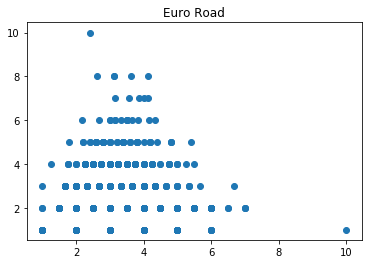

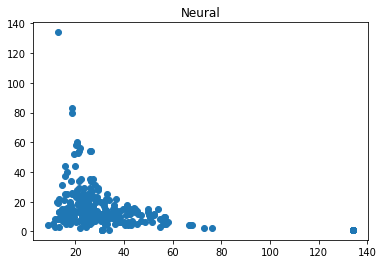

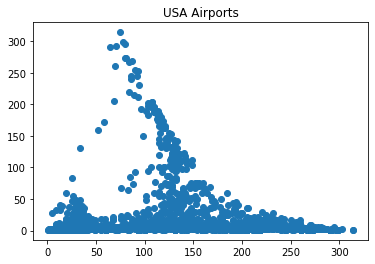

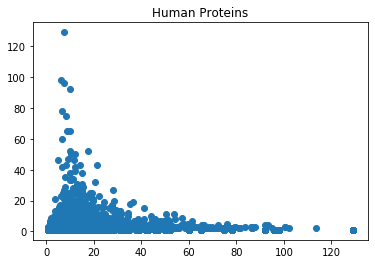

,Euro Road,Neural,USA Airports,Human Proteins
knn x k correlation,0.173060,-0.322403,-0.048564,-0.075970
assortativity,0.126684,-0.171321,-0.113295,-0.114032


In [63]:
undict = lambda d: list(dict(d).values())

corrs = []
assort = []

for G, name in zip(allG, allNames):
    plt.figure()
    A = undict(nx.average_neighbor_degree(G))
    B = undict(G.degree())
    plt.scatter(A, B)
    corrs.append(np.corrcoef(A, B)[1,0])
    assort.append(nx.degree_assortativity_coefficient(G))
    plt.title(name)
    plt.show()

corrs2 = np.array([corrs, assort])

df = pd.DataFrame(corrs2, columns=allNames)
df.index = ["knn x k correlation", "assortativity"]
df

## The correlation is measuring the dependence between the degree of a node and the average degree of its neighbors. If the correlation is positive, we expect that high-degree nodes are connected to high-degree nodes, which implies assortativity.

## Since we are considering the *average* degree of the neighbors, if the *variance* of the neighbor degree is high, the correlation might become less related to the assortativity, which did not happen here.

## We conclude that the correlation is itself highly correlated with the assortativity.

In [66]:
def knn_stddev(G):
    degs = G.degree()
    res = []
    for node in G.nodes:
        neig = nx.neighbors(G, node)
        neig = list(neig)
        neigDegs = [ degs[i] for i in neig ]
        res.append(np.std(neigDegs))

    return np.mean(res), np.std(res)

for G, name in zip(allG, allNames):
    print(name, knn_stddev(G))

Euro Road (0.6976007866043488, 0.7009231974717106)
Neural (22.654892138048293, 12.965502657686836)
USA Airports (48.05969050675261, 37.74862945153178)
Human Proteins (7.75000892879954, 11.857923831311597)


## I did the above to see whether the variance of the neighbors degree would affect the difference between the $knn \times k$ correlation and the assortativity.

## The result is inconclusive, though.

# Problem 6

## The question tells us to use a Girvan-Newman benchmark with N=128, kin+kout = 16 and 4 communities, but it also tells us to use the networkx method `networkx.community.LFR_benchmark_graph`, which is not the Girvan Newman one...

## Networkx does not seem to offer the Girvan-Newman benchmark, so I will try to mimic it.

/home/mathjs/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


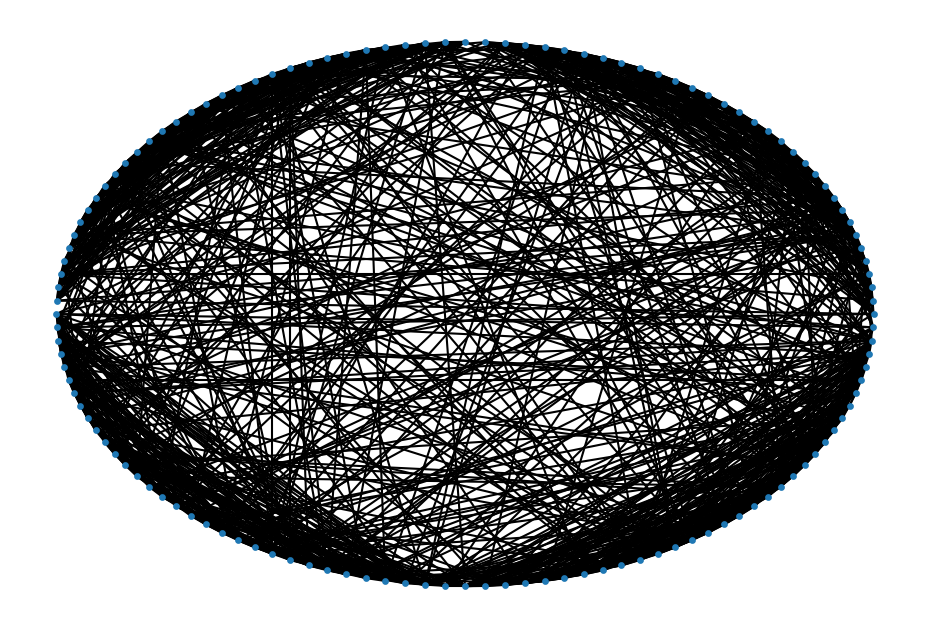

In [235]:
benchG = nx.random_partition_graph(
    sizes=[128//4]*4,
    p_in=36/100,
    p_out=5/100
)

plt.figure(dpi=150)
nx.draw_shell(benchG, with_labels=False, node_size=5)

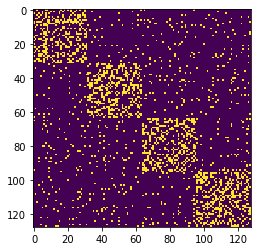

In [236]:
#np.array(benchG.node[1]["community"])
plt.imshow(nx.adj_matrix(benchG).todense())

In [237]:
groupSize = 128/4

allCommunities = np.array([ np.arange(groupSize*i, groupSize*i+groupSize) for i in range(4) ])
allCommunities

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.],
       [ 32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
         43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
         54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.],
       [ 64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
         75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,
         86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.],
       [ 96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
        107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
        118., 119., 120., 121., 122., 123., 124., 125., 126., 127.]])

## Now we check if k_in + k_out is 16

In [238]:
np.mean(undict(benchG.degree))

15.765625

In [242]:
[ np.mean(undict(benchG.subgraph(allCommunities[i]).degree)) for i in range(4) ]

[10.6875, 11.0625, 10.4375, 11.625]

## These graphs seem good enough. Let's use it as benchmark

In [308]:
import scipy.stats
from louvain.community import best_partition

def mutual_info(partitions1, partitions2):
    size1 = sum([len(P) for P in partitions1])
    size2 = sum([len(P) for P in partitions2])
    
    probC1 = [ len(C) / size1 for C in partitions1 ]
    probC2 = [ len(C) / size2 for C in partitions2 ]
    probC1C2 = np.matrix([
        [   len(set(C1).intersection(set(C2))) / (size1*size2)
            for C2 in partitions2 # in columns
        ]
        for C1 in partitions1 # in rows
    ])
    info = [ probC1C2[i, j] * np.log(probC1C2[i, j] / (probC1[i] * probC2[j]))
              for i, C1 in enumerate(partitions1)
              for j, C2 in enumerate(partitions2)
              if probC1C2[i, j] > 0.0
           ]
    info = sum(info)

    norm = info / (scipy.stats.entropy(probC1) + scipy.stats.entropy(probC2))
    
    return norm

res = nx.community.greedy_modularity_communities(benchG)
print("Greedy Modularity", mutual_info(res, allCommunities))

res = nx.community.label_propagation_communities(benchG)
print("Label Propagation", mutual_info(list(res), allCommunities))

res = nx.community.girvan_newman(benchG)
next(res)
res = [i for i in next(res)]
print("Girvan-Newman", mutual_info(list(res), allCommunities))

res = best_partition(benchG)
res = [ [ key for key in res.keys() if res[key] == val ] for val in set(res.values()) ]
print("Louvain", mutual_info(list(res), allCommunities))

Greedy Modularity -0.010060369166600634
Label Propagation -0.02734375
Girvan-Newman -0.012345258821042263
Louvain -0.009765625


## We conclude that Louvain was best, because it yielded the lowest entropy.

## Let us confirm this by using networkx's built-in accuracy measures

In [326]:
for i, comm in enumerate(allCommunities):
    for n in comm:
        benchG.node[n]["community"] = i

res = nx.community.greedy_modularity_communities(benchG)
print("Greedy Modularity", nx.community.performance(benchG, res))

res = nx.community.label_propagation_communities(benchG)
print("Label Propagation", nx.community.performance(benchG, list(res)))

res = nx.community.girvan_newman(benchG)
next(res)
res = [i for i in next(res)]
print("Girvan-Newman", nx.community.performance(benchG, list(res)))

res = best_partition(benchG)
res = [ [ key for key in res.keys() if res[key] == val ] for val in set(res.values()) ]
print("Louvain", nx.community.performance(benchG, list(res)))

Greedy Modularity 0.8014271653543307
Label Propagation 0.12413877952755906
Girvan-Newman 0.6934055118110236
Louvain 0.8042568897637795


## Which confirms our previous results.

# Problem 7